# Coffee from major markets provide more marketing, sales, and profits

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#load data from https://data.world/santhosh586/gfdgdg
url = 'https://query.data.world/s/nfygopbhprl2ar5ney4g2ja54jdc2t'
COFFEE = pd.read_excel(url)
print(COFFEE)
print(COFFEE.shape) #dimensions of dataframe
col_names = ['Row_ID', 'Area_Code', 'Date', 'Market', 'Market_Size', 'Product', 'Product_Line', 'Product_Type', 'State',
             'Type', 'Budget_COGS', 'Budget_Margin', 'Budget_Profit', 'Budget_Sales', 'COGS', 'Inventory', 'Margin',
             'Marketing', 'Profit', 'Sales', 'Total_Expenses']
dframe = pd.read_excel(url, names = col_names) #replace spaces with _ in the columns

      Row ID  Area Code   Date   Market   Market Size            Product  \
0          1        719  40909  Central  Major Market           Amaretto   
1          2        970  40909  Central  Major Market          Colombian   
2          3        970  40909  Central  Major Market  Decaf Irish Cream   
3          4        303  40909  Central  Major Market          Green Tea   
4          5        303  40909  Central  Major Market        Caffe Mocha   
...      ...        ...    ...      ...           ...                ...   
8491    8492        318  41609    South  Small Market              Lemon   
8492    8493        985  41609    South  Small Market          Colombian   
8493    8494        337  41609    South  Small Market  Decaf Irish Cream   
8494    8495        225  41609    South  Small Market        Caffe Latte   
8495    8496        225  41609    South  Small Market        Caffe Mocha   

     Product Line Product Type      State     Type  ...  Budget Margin  \
0           B

# Market Sizes

In [3]:
market_sizes = dframe.Market_Size.unique()
print(market_sizes) #print list of unique market sizes

major = dframe.loc[dframe.Market_Size == 'Major Market'] #data of coffee in a major market
small = dframe.loc[dframe.Market_Size == 'Small Market'] #data of coffee in a small market

print(major.describe()) #print statistical details of data of coffee in a major market
print(small.describe()) #print statistical details of data of coffee in a small market

print(major.shape[0]) #number of coffee in a major market
print(small.shape[0]) #number of coffee in a small market

majormeanM = major.mean()[10] #mean marketing of coffee in a major market
smallmeanM = small.mean()[10] #mean marketing of coffee in a small market

majormeanS = major.mean()[12] #mean sales of coffee in a major market
smallmeanS = small.mean()[12] #mean sales of coffee in a small market

majormeanP = major.mean()[11] #mean profit of coffee in a major market
smallmeanP = small.mean()[11] #mean profit of coffee in a small market

['Major Market' 'Small Market']
            Row_ID    Area_Code          Date  Budget_COGS  Budget_Margin  \
count  3408.000000  3408.000000   3408.000000  3408.000000    3408.000000   
mean   4241.687207   616.668427  41258.916667   101.420188     133.485915   
std    2466.662877   236.806490    210.719059    81.582395     119.115943   
min       1.000000   209.000000  40909.000000     0.000000    -140.000000   
25%    2116.750000   408.000000  41083.500000    40.000000      60.000000   
50%    4232.500000   646.000000  41259.500000    70.000000     105.000000   
75%    6384.250000   815.000000  41433.500000   130.000000     160.000000   
max    8490.000000   979.000000  41609.000000   450.000000     690.000000   

       Budget_Profit  Budget_Sales         COGS    Inventory       Margin  \
count    3408.000000   3408.000000  3408.000000  3408.000000  3408.000000   
mean       86.842723    234.906103   108.801643   860.448357   135.438967   
std       104.698019    187.102456    74.31

There are 3408 coffee in a major market.

There are 5088 coffee in a small market.

# Coffee Types

In [4]:
types = dframe.Type.unique()
print(types) #print list of unique coffee types

regular = dframe.loc[dframe.Type == 'Regular'] #data of non-decaf
decaf = dframe.loc[dframe.Type == 'Decaf'] #data of decaf

print(regular.describe()) #print statistical details of data of non-decaf
print(decaf.describe()) #print statistical details of data of decaf

print(regular.shape[0]) #number of non-decaf
print(decaf.shape[0]) #number of decaf

regmeanM = regular.mean()[10] #mean marketing of non-decaf
decafmeanM = decaf.mean()[10] #mean marketing of decaf

regmeanS = regular.mean()[12] #mean sales of non-decaf
decafmeanS = decaf.mean()[12] #mean sales of decaf

regmeanP = regular.mean()[11] #mean profit of non-decaf
decafmeanP = decaf.mean()[11] #mean profit of decaf

['Regular' 'Decaf']
            Row_ID    Area_Code          Date  Budget_COGS  Budget_Margin  \
count  4800.000000  4800.000000   4800.000000  4800.000000    4800.000000   
mean   4250.363333   583.617917  41258.916667    75.391667     105.000000   
std    2453.611883   219.211140    210.710092    71.420650     105.338241   
min       1.000000   203.000000  40909.000000     0.000000    -210.000000   
25%    2126.750000   425.000000  41083.500000    30.000000      50.000000   
50%    4248.000000   580.000000  41259.500000    50.000000      70.000000   
75%    6373.250000   755.500000  41433.500000    90.000000     130.000000   
max    8496.000000   985.000000  41609.000000   450.000000     690.000000   

       Budget_Profit  Budget_Sales         COGS    Inventory       Margin  \
count    4800.000000   4800.000000  4800.000000  4800.000000  4800.000000   
mean       63.133333    180.391667    84.573333   718.427500   107.710833   
std        91.753853    166.796960    71.162113   756.1

There are 4800 non-decaf.

There are 3696 decaf.

## Major Market

In [5]:
mregular = major.loc[major.Type == 'Regular'] #data of non-decaf in a major market
mdecaf = major.loc[major.Type == 'Decaf'] #data of decaf in a major market

print(mregular.describe()) #print statistical details of data of non-decaf in a major market
print(mdecaf.describe()) #print statistical details of data of decaf in a major market

print(mregular.shape[0]) #number of non-decaf in a major market
print(mdecaf.shape[0]) #number of decaf in a major market

mregmeanM = mregular.mean()[10] #mean marketing of non-decaf in a major market
mdecafmeanM = mdecaf.mean()[10] #mean marketing of decaf in a major market

mregmeanS = mregular.mean()[12] #mean sales of non-decaf in a major market
mdecafmeanS = mdecaf.mean()[12] #mean sales of decaf in a major market

mregmeanP = mregular.mean()[11] #mean profit of non-decaf in a major market
mdecafmeanP = mdecaf.mean()[11] #mean profit of decaf in a major market

            Row_ID    Area_Code          Date  Budget_COGS  Budget_Margin  \
count  1920.000000  1920.000000   1920.000000  1920.000000    1920.000000   
mean   4242.510938   617.259375  41258.916667   108.062500     152.562500   
std    2465.936712   235.068361    210.743030    87.835392     135.695365   
min       1.000000   209.000000  40909.000000    10.000000     -90.000000   
25%    2118.750000   413.000000  41083.500000    50.000000      70.000000   
50%    4232.000000   646.000000  41259.500000    80.000000     110.000000   
75%    6381.250000   815.000000  41433.500000   130.000000     180.000000   
max    8490.000000   979.000000  41609.000000   450.000000     690.000000   

       Budget_Profit  Budget_Sales         COGS    Inventory       Margin  \
count    1920.000000   1920.000000  1920.000000  1920.000000  1920.000000   
mean      101.645833    260.625000   111.997917   850.589583   151.235417   
std       119.327626    211.641455    74.989178   730.039208   122.976397  

There are 1920 non-decaf in a major market.

There are 1488 decaf in a major market.

## Small Market

In [6]:
sregular = small.loc[small.Type == 'Regular'] #data of non-decaf in a small market
sdecaf = small.loc[small.Type == 'Decaf'] #data of decaf in a small market

print(sregular.describe()) #print statistical details of data of non-decaf in a small market
print(sdecaf.describe()) #print statistical details of data of decaf in a small market

print(sregular.shape[0]) #number of non-decaf in a small market
print(sdecaf.shape[0]) #number of decaf in a small market

sregmeanM = sregular.mean()[10] #mean marketing of non-decaf in a small market
sdecafmeanM = sdecaf.mean()[10] #mean marketing of decaf in a small market

sregmeanS = sregular.mean()[12] #mean sales of non-decaf in a small market
sdecafmeanS = sdecaf.mean()[12] #mean sales of decaf in a small market

sregmeanP = sregular.mean()[11] #mean profit of non-decaf in a small market
sdecafmeanP = sdecaf.mean()[11] #mean profit of decaf in a small market

            Row_ID    Area_Code          Date  Budget_COGS  Budget_Margin  \
count  2880.000000  2880.000000   2880.000000  2880.000000    2880.000000   
mean   4255.598264   561.190278  41258.916667    53.611111      73.291667   
std    2445.775767   204.965138    210.724729    46.624305      60.896381   
min      21.000000   203.000000  40909.000000     0.000000    -210.000000   
25%    2141.000000   435.000000  41083.500000    20.000000      40.000000   
50%    4258.000000   541.000000  41259.500000    40.000000      60.000000   
75%    6369.250000   702.000000  41433.500000    60.000000      90.000000   
max    8496.000000   985.000000  41609.000000   250.000000     340.000000   

       Budget_Profit  Budget_Sales         COGS    Inventory       Margin  \
count    2880.000000   2880.000000  2880.000000  2880.000000  2880.000000   
mean       37.458333    126.902778    66.290278   630.319444    78.694444   
std        53.791936     96.766716    62.104891   760.582140    78.729763  

There are 2880 non-decaf in a small market.

There are 2208 decaf in a small market.

# Coffee Product Lines

In [7]:
product_lines = dframe.Product_Line.unique()
print(product_lines) #print list of unique coffee product lines

beans = dframe.loc[dframe.Product_Line == 'Beans'] #data of coffee
leaves = dframe.loc[dframe.Product_Line == 'Leaves'] #data of tea

print(beans.describe()) #print statistical details of data of coffee
print(leaves.describe()) #print statistical details of data of tea

print(beans.shape[0]) #number of coffee
print(leaves.shape[0]) #number of tea

beansmeanM = beans.mean()[10] #mean marketing of coffee
leavesmeanM = leaves.mean()[10] #mean marketing of tea

beansmeanS = beans.mean()[12] #mean sales of coffee
leavesmeanS = leaves.mean()[12] #mean sales of tea

beansmeanP = beans.mean()[11] #mean profit of coffee
leavesmeanP = leaves.mean()[11] #mean profit of tea

['Beans' 'Leaves']
            Row_ID    Area_Code          Date  Budget_COGS  Budget_Margin  \
count  4464.000000  4464.000000   4464.000000  4464.000000    4464.000000   
mean   4245.082661   575.207437  41258.916667    84.086022     113.987455   
std    2447.475608   223.792803    210.711744    74.849720     105.836640   
min       1.000000   203.000000  40909.000000     0.000000     -90.000000   
25%    2129.250000   414.000000  41083.500000    40.000000      60.000000   
50%    4248.500000   563.000000  41259.500000    60.000000      80.000000   
75%    6347.250000   754.000000  41433.500000   100.000000     140.000000   
max    8496.000000   985.000000  41609.000000   450.000000     690.000000   

       Budget_Profit  Budget_Sales         COGS    Inventory       Margin  \
count    4464.000000   4464.000000  4464.000000  4464.000000  4464.000000   
mean       69.793907    198.073477    84.093190   714.024194   108.756272   
std        91.372156    170.575749    66.846756   639.22

There are 4464 coffee.

There are 4032 tea.

## Major Market

In [8]:
mbeans = major.loc[major.Product_Line == 'Beans'] #data of coffee in a major market
mleaves = major.loc[major.Product_Line == 'Leaves'] #data of tea in a major market

print(mbeans.describe()) #print statistical details of data of coffee in a major market
print(mleaves.describe()) #print statistical details of data of tea in a major market

print(mbeans.shape[0]) #number of coffee in a major market
print(mleaves.shape[0]) #number of tea in a major market

mbeansmeanM = mbeans.mean()[10] #mean marketing of coffee in a major market
mleavesmeanM = mleaves.mean()[10] #mean marketing of tea in a major market

mbeansmeanS = mbeans.mean()[12] #mean sales of coffee in a major market
mleavesmeanS = mleaves.mean()[12] #mean sales of tea in a major market

mbeansmeanP = mbeans.mean()[11] #mean profit of coffee in a major market
mleavesmeanP = mleaves.mean()[11] #mean profit of tea in a major market

            Row_ID    Area_Code          Date  Budget_COGS  Budget_Margin  \
count  1680.000000  1680.000000   1680.000000  1680.000000    1680.000000   
mean   4240.185714   612.665476  41258.916667   138.238095     178.000000   
std    2461.638817   243.582149    210.750875    92.293859     144.622241   
min       1.000000   209.000000  40909.000000    30.000000     -90.000000   
25%    2121.250000   361.000000  41083.500000    60.000000      80.000000   
50%    4232.500000   630.500000  41259.500000   100.000000     140.000000   
75%    6382.250000   815.500000  41433.500000   210.000000     260.000000   
max    8490.000000   979.000000  41609.000000   450.000000     690.000000   

       Budget_Profit  Budget_Sales         COGS    Inventory       Margin  \
count    1680.000000   1680.000000  1680.000000  1680.000000  1680.000000   
mean      114.380952    316.238095   134.595238   950.061905   169.688095   
std       132.942500    218.346464    79.576862   862.243450   133.213869  

There are 1680 coffee in a major market.

There are 1728 tea in a major market.

## Small Market

In [9]:
sbeans = small.loc[small.Product_Line == 'Beans'] #data of coffee in a small market
sleaves = small.loc[small.Product_Line == 'Leaves'] #data of tea in a small market

print(sbeans.describe()) #print statistical details of data of coffee in a small market
print(sleaves.describe()) #print statistical details of data of tea in a small market

print(sbeans.shape[0]) #number of coffee in a small market
print(sleaves.shape[0]) #number of tea in a small market

sbeansmeanM = sbeans.mean()[10] #mean marketing of coffee in a small market
sleavesmeanM = sleaves.mean()[10] #mean marketing of tea in a small market

sbeansmeanS = sbeans.mean()[12] #mean sales of coffee in a small market
sleavesmeanS = sleaves.mean()[12] #mean sales of tea in a small market

sbeansmeanP = sbeans.mean()[11] #mean profit of coffee in a small market
sleavesmeanP = sleaves.mean()[11] #mean profit of tea in a small market

            Row_ID    Area_Code          Date  Budget_COGS  Budget_Margin  \
count  2784.000000  2784.000000   2784.000000  2784.000000    2784.000000   
mean   4248.037716   552.603448  41258.916667    51.408046      75.359195   
std    2439.327553   207.757271    210.725991    31.733260      37.128521   
min      21.000000   203.000000  40909.000000     0.000000      10.000000   
25%    2142.750000   425.000000  41083.500000    30.000000      50.000000   
50%    4258.500000   515.000000  41259.500000    50.000000      70.000000   
75%    6337.750000   702.000000  41433.500000    70.000000      90.000000   
max    8496.000000   985.000000  41609.000000   170.000000     230.000000   

       Budget_Profit  Budget_Sales         COGS    Inventory       Margin  \
count    2784.000000   2784.000000  2784.000000  2784.000000  2784.000000   
mean       42.887931    126.767241    53.617816   571.587644    71.987069   
std        28.317162     66.199388    29.611409   390.905886    35.521370  

There are 2784 coffee in a small market.

There are 2304 tea in a small market.

# Coffee Product Types

In [10]:
product_types = dframe.Product_Type.unique() #list of unique product types
Beans = beans.Product_Type.unique()
print(Beans) #print list of unique coffee product types
Leaves = leaves.Product_Type.unique()
print(Leaves) #print list of unique tea product types

coffee = beans.loc[beans.Product_Type == 'Coffee'] #data of regular coffee
espresso = beans.loc[beans.Product_Type == 'Espresso'] #data of espresso coffee
tea = leaves.loc[leaves.Product_Type == 'Tea'] #data of tea
herbal = leaves.loc[leaves.Product_Type == 'Herbal Tea'] #data of herbal tea

print(coffee.describe()) #print statistical details of data of regular coffee
print(espresso.describe()) #print statistical details of data of espresso coffee
print(tea.describe()) #print statistical details of data of tea
print(herbal.describe()) #print statistical details of data of herbal tea

print(coffee.shape[0]) #number of regular coffee
print(espresso.shape[0]) #number of espresso coffee
print(tea.shape[0]) #number of tea
print(herbal.shape[0]) #number of herbal tea

coffeemeanM = coffee.mean()[10] #mean marketing of regular coffee
espmeanM = espresso.mean()[10] #mean marketing of espresso coffee
teameanM = tea.mean()[10] #mean marketing of tea
herbalmeanM = herbal.mean()[10] #mean marketing of herbal tea

coffeemeanS = coffee.mean()[12] #mean sales of regular coffee
espmeanS = espresso.mean()[12] #mean sales of espresso coffee
teameanS = tea.mean()[12] #mean sales of tea
herbalmeanS = herbal.mean()[12] #mean sales of herbal tea

coffeemeanP = coffee.mean()[11] #mean profit of regular coffee
espmeanP = espresso.mean()[11] #mean profit of espresso coffee
teameanP = tea.mean()[11] #mean profit of tea
herbalmeanP = herbal.mean()[11] #mean profit of herbal tea

['Coffee' 'Espresso']
['Tea' 'Herbal Tea']
            Row_ID    Area_Code          Date  Budget_COGS  Budget_Margin  \
count  2112.000000  2112.000000   2112.000000  2112.000000    2112.000000   
mean   4245.698864   584.530303  41258.916667    91.742424     124.753788   
std    2452.542294   221.483301    210.738038    75.931568     119.155150   
min       1.000000   203.000000  40909.000000     0.000000     -90.000000   
25%    2130.000000   419.000000  41083.500000    50.000000      60.000000   
50%    4248.500000   573.000000  41259.500000    70.000000      90.000000   
75%    6352.500000   730.250000  41433.500000   100.000000     140.000000   
max    8494.000000   985.000000  41609.000000   450.000000     690.000000   

       Budget_Profit  Budget_Sales         COGS    Inventory       Margin  \
count    2112.000000   2112.000000  2112.000000  2112.000000  2112.000000   
mean       79.431818    216.496212    85.886364   761.320076   115.125000   
std       103.100486    179.7056

In terms of coffee:

There are 2112 regular coffee.

There are 2352 espresso coffee.



In terms of tea:

There are 1920 regular tea.

There are 2112 herbal tea.

## Major Market

In [11]:
mcoffee = mbeans.loc[mbeans.Product_Type == 'Coffee'] #data of regular coffee in a major market
mespresso = mbeans.loc[mbeans.Product_Type == 'Espresso'] #data of espresso coffee in a major market
mtea = mleaves.loc[mleaves.Product_Type == 'Tea'] #data of tea in a major market
mherbal = mleaves.loc[mleaves.Product_Type == 'Herbal Tea'] #data of herbal tea in a major market

print(mcoffee.describe()) #print statistical details of data of regular coffee in a major market
print(mespresso.describe()) #print statistical details of data of espresso coffee in a major market
print(mtea.describe()) #print statistical details of data of tea in a major market
print(mherbal.describe()) #print statistical details of data of herbal tea in a major market

print(mcoffee.shape[0]) #number of regular coffee in a major market
print(mespresso.shape[0]) #number of espresso coffee in a major market
print(mtea.shape[0]) #number of tea in a major market
print(mherbal.shape[0]) #number of herbal tea in a major market

mcoffeemeanM = mcoffee.mean()[10] #mean marketing of regular coffee in a major market
mespmeanM = mespresso.mean()[10] #mean marketing of espresso coffee in a major market
mteameanM = mtea.mean()[10] #mean marketing of tea in a major market
mherbalmeanM = mherbal.mean()[10] #mean marketing of herbal tea in a major market

mcoffeemeanS = mcoffee.mean()[12] #mean sales of regular coffee in a major market
mespmeanS = mespresso.mean()[12] #mean sales of espresso coffee in a major market
mteameanS = mtea.mean()[12] #mean sales of tea in a major market
mherbalmeanS = mherbal.mean()[12] #mean sales of herbal tea in a major market

mcoffeemeanP = mcoffee.mean()[11] #mean profit of regular coffee in a major market
mespmeanP = mespresso.mean()[11] #mean profit of espresso coffee in a major market
mteameanP = mtea.mean()[11] #mean profit of tea in a major market
mherbalmeanP = mherbal.mean()[11] #mean profit of herbal tea in a major market

            Row_ID   Area_Code          Date  Budget_COGS  Budget_Margin  \
count   816.000000  816.000000    816.000000   816.000000     816.000000   
mean   4240.328431  630.757353  41258.916667   138.725490     185.686275   
std    2466.849554  241.746097    210.817359    99.329498     167.841642   
min       1.000000  209.000000  40909.000000    30.000000     -90.000000   
25%    2122.000000  413.000000  41083.500000    60.000000      70.000000   
50%    4232.500000  682.000000  41259.500000   100.000000     140.000000   
75%    6383.250000  821.000000  41433.500000   192.500000     290.000000   
max    8490.000000  979.000000  41609.000000   450.000000     690.000000   

       Budget_Profit  Budget_Sales        COGS    Inventory      Margin  \
count     816.000000    816.000000  816.000000   816.000000  816.000000   
mean      127.794118    324.411765  129.651961   941.303922  177.622549   
std       149.622139    240.190409   82.718483  1036.595260  155.039895   
min      -150.0

In terms of coffee:

There are 816 regular coffee in a major market.

There are 864 espresso coffee in a major market.



In terms of tea:

There are 816 regular tea in a major market.

There are 912 herbal tea in a major market.

## Small Market

In [12]:
scoffee = sbeans.loc[sbeans.Product_Type == 'Coffee'] #data of regular coffee
sespresso = sbeans.loc[sbeans.Product_Type == 'Espresso'] #data of espresso coffee
stea = sleaves.loc[sleaves.Product_Type == 'Tea'] #data of tea
sherbal = sleaves.loc[sleaves.Product_Type == 'Herbal Tea'] #data of herbal tea

print(scoffee.describe()) #print statistical details of data of regular coffee
print(sespresso.describe()) #print statistical details of data of espresso coffee
print(stea.describe()) #print statistical details of data of tea
print(sherbal.describe()) #print statistical details of data of herbal tea

print(scoffee.shape[0]) #number of regular coffee
print(sespresso.shape[0]) #number of espresso coffee
print(stea.shape[0]) #number of tea
print(sherbal.shape[0]) #number of herbal tea

scoffeemeanM = scoffee.mean()[10] #mean marketing of regular coffee
sespmeanM = sespresso.mean()[10] #mean marketing of espresso coffee
steameanM = stea.mean()[10] #mean marketing of tea
sherbalmeanM = sherbal.mean()[10] #mean marketing of herbal tea

scoffeemeanS = scoffee.mean()[12] #mean sales of regular coffee
sespmeanS = sespresso.mean()[12] #mean sales of espresso coffee
steameanS = stea.mean()[12] #mean sales of tea
sherbalmeanS = sherbal.mean()[12] #mean sales of herbal tea

scoffeemeanP = scoffee.mean()[11] #mean profit of regular coffee
sespmeanP = sespresso.mean()[11] #mean profit of espresso coffee
steameanP = stea.mean()[11] #mean profit of tea
sherbalmeanP = sherbal.mean()[11] #mean profit of herbal tea

            Row_ID    Area_Code          Date  Budget_COGS  Budget_Margin  \
count  1296.000000  1296.000000   1296.000000  1296.000000    1296.000000   
mean   4249.080247   555.424383  41258.916667    62.160494      86.388889   
std    2444.439352   202.462791    210.769473    30.374123      40.033770   
min      21.000000   203.000000  40909.000000     0.000000      10.000000   
25%    2143.500000   425.000000  41083.500000    40.000000      60.000000   
50%    4258.500000   515.000000  41259.500000    60.000000      80.000000   
75%    6338.500000   702.000000  41433.500000    80.000000     110.000000   
max    8494.000000   985.000000  41609.000000   160.000000     230.000000   

       Budget_Profit  Budget_Sales         COGS    Inventory       Margin  \
count    1296.000000   1296.000000  1296.000000  1296.000000  1296.000000   
mean       48.981481    148.549383    58.330247   647.996914    75.774691   
std        28.930159     66.158070    26.376757   286.543922    36.598734  

In terms of coffee:

There are 1296 regular coffee in a small market.

There are 1488 espresso coffee in a small market.



In terms of tea:

There are 1104 regular tea in a small market.

There are 1200 herbal tea in a small market.

# Analysis

In [13]:
M = np.array(dframe['Marketing']) #convert marketing column into array
S = np.array(dframe['Sales']) #convert sales column into array
P = np.array(dframe['Profit']) #convert profit column into array
m = np.reshape(M, (dframe.shape[0], 1)) #convert marketing column from 1 dimension to 2 dimensions
s = np.reshape(S, (dframe.shape[0], 1)) #convert sales column from 1 dimension to 2 dimensions
p = np.reshape(P, (dframe.shape[0], 1)) #convert profit column from 1 dimension to 2 dimensions

print(market_sizes)
marketmeanM = [majormeanM, smallmeanM]
marketmeanS = [majormeanS, smallmeanS]
marketmeanP = [majormeanP, smallmeanP]

print(types)
typemeanM = [regmeanM, decafmeanM]
typemeanS = [regmeanS, decafmeanS]
typemeanP = [regmeanP, decafmeanP]

mtypemeanM = [mregmeanM, mdecafmeanM]
mtypemeanS = [mregmeanS, mdecafmeanS]
mtypemeanP = [mregmeanP, mdecafmeanP]

stypemeanM = [sregmeanM, sdecafmeanM]
stypemeanS = [sregmeanS, sdecafmeanS]
stypemeanP = [sregmeanP, sdecafmeanP]

print(product_lines)
linemeanM = [beansmeanM, leavesmeanM]
linemeanS = [beansmeanS, leavesmeanS]
linemeanP = [beansmeanP, leavesmeanP]

mlinemeanM = [mbeansmeanM, mleavesmeanM]
mlinemeanS = [mbeansmeanS, mleavesmeanS]
mlinemeanP = [mbeansmeanP, mleavesmeanP]

slinemeanM = [sbeansmeanM, sleavesmeanM]
slinemeanS = [sbeansmeanS, sleavesmeanS]
slinemeanP = [sbeansmeanP, sleavesmeanP]

print(product_types)
prodtypemeanM = [coffeemeanM, teameanM, espmeanM, herbalmeanM]
prodtypemeanS = [coffeemeanS, teameanS, espmeanS, herbalmeanS]
prodtypemeanP = [coffeemeanP, teameanP, espmeanP, herbalmeanP]

mprodtypemeanM = [mcoffeemeanM, mteameanM, mespmeanM, mherbalmeanM]
mprodtypemeanS = [mcoffeemeanS, mteameanS, mespmeanS, mherbalmeanS]
mprodtypemeanP = [mcoffeemeanP, mteameanP, mespmeanP, mherbalmeanP]

sprodtypemeanM = [scoffeemeanM, steameanM, sespmeanM, sherbalmeanM]
sprodtypemeanS = [scoffeemeanS, steameanS, sespmeanS, sherbalmeanS]
sprodtypemeanP = [scoffeemeanP, steameanP, sespmeanP, sherbalmeanP]

print(Beans)
BeanmeanM = [coffeemeanM, espmeanM]
BeanmeanS = [coffeemeanS, espmeanS]
BeanmeanP = [coffeemeanP, espmeanP]

mbeanmeanM = [mcoffeemeanM, mespmeanM]
mbeanmeanS = [mcoffeemeanS, mespmeanS]
mbeanmeanP = [mcoffeemeanP, mespmeanP]

sbeanmeanM = [scoffeemeanM, sespmeanM]
sbeanmeanS = [scoffeemeanS, sespmeanS]
sbeanmeanP = [scoffeemeanP, sespmeanP]

print(Leaves)
LeavesmeanM = [teameanM, herbalmeanM]
LeavesmeanS = [teameanS, herbalmeanS]
LeavesmeanP = [teameanP, herbalmeanP]

mleavesmeanM = [mteameanM, mherbalmeanM]
mleavesmeanS = [mteameanS, mherbalmeanS]
mleavesmeanP = [mteameanP, mherbalmeanP]

sleavesmeanM = [steameanM, sherbalmeanM]
sleavesmeanS = [steameanS, sherbalmeanS]
sleavesmeanP = [steameanP, sherbalmeanP]

['Major Market' 'Small Market']
['Regular' 'Decaf']
['Beans' 'Leaves']
['Coffee' 'Tea' 'Espresso' 'Herbal Tea']
['Coffee' 'Espresso']
['Tea' 'Herbal Tea']


## Marketing VS Sales

y = 3.9736997969445738*x + 69.06758312136641
R**2 = 0.5048314145522697
R = 0.7105148939693451
MSE = 11307.593156928428


[Text(0.5, 0, 'Marketing'), Text(0, 0.5, 'Sales')]

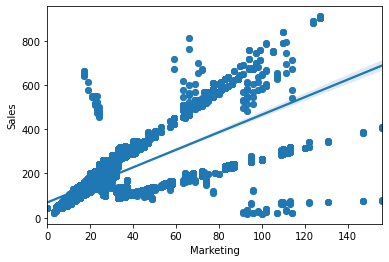

In [14]:
lineMS = LinearRegression().fit(m, s) #regression line
coeffsMS = np.array([[lineMS.intercept_], [lineMS.coef_]]) #coefficients of regression line
print("y = " + str(coeffsMS[1][0][0])+"*x + " + str(coeffsMS[0][0][0]))
detMS = lineMS.score(m, s) #coefficient of determination
print("R**2 = " + str(detMS))
corrMS = np.sign(lineMS.coef_)*np.sqrt(detMS) #correlation coefficient
print("R = " + str(corrMS[0][0]))
predictionMS = lineMS.predict(m)
MSEMS = mean_squared_error(s, predictionMS) #mean squared error
print("MSE = " + str(MSEMS))
graphMS = sns.regplot(x=dframe['Marketing'], y=dframe['Sales'])
graphMS.set(xlabel='Marketing', ylabel='Sales')

## Marketing VS Profit

y = 0.8485918396366977*x + 34.63433254142375
R**2 = 0.050834483148672005
R = 0.22546503753059366
MSE = 9816.453096807567


[Text(0.5, 0, 'Marketing'), Text(0, 0.5, 'Profit')]

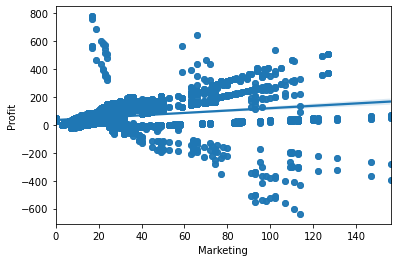

In [15]:
lineMP = LinearRegression().fit(m, p) #regression line
coeffsMP = np.array([[lineMP.intercept_], [lineMP.coef_]]) #coefficients of regression line
print("y = " + str(coeffsMP[1][0][0])+"*x + " + str(coeffsMP[0][0][0]))
detMP = lineMP.score(m, p) #coefficient of determination
print("R**2 = " + str(detMP))
corrMP = np.sign(lineMP.coef_)*np.sqrt(detMP) #correlation coefficient
print("R = " + str(corrMP[0][0]))
predictionMP = lineMP.predict(m)
MSEMP = mean_squared_error(p, predictionMP) #mean squared error
print("MSE = " + str(MSEMP))
graphMP = sns.regplot(x=dframe['Marketing'], y=dframe['Profit'])
graphMP.set(xlabel='Marketing', ylabel='Profit')

## Sales VS Profit

y = 0.5365823401211974*x - 42.456003963535544
R**2 = 0.635736572930351
R = 0.797330905540699
MSE = 3767.2827164787145


[Text(0.5, 0, 'Sales'), Text(0, 0.5, 'Profit')]

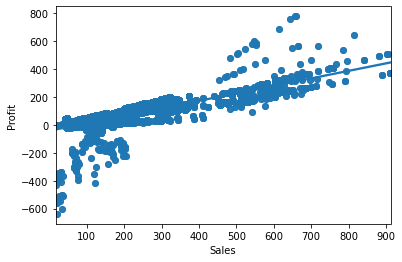

In [16]:
lineSP = LinearRegression().fit(s, p) #regression line
coeffsSP = np.array([[lineSP.intercept_], [lineSP.coef_]]) #coefficients of regression line
print("y = " + str(coeffsSP[1][0][0])+"*x - " + str(-coeffsSP[0][0][0]))
detSP = lineSP.score(s, p) #coefficient of determination
print("R**2 = " + str(detSP))
corrSP = np.sign(lineSP.coef_)*np.sqrt(detSP) #correlation coefficient
print("R = " + str(corrSP[0][0]))
predictionSP = lineSP.predict(s)
MSESP = mean_squared_error(p, predictionSP) #mean squared error
print("MSE = " + str(MSESP))
graphSP = sns.regplot(x=dframe['Sales'], y=dframe['Profit'])
graphSP.set(xlabel='Sales', ylabel='Profit')

## Market Size

[37.85328638497653, 26.718553459119498]


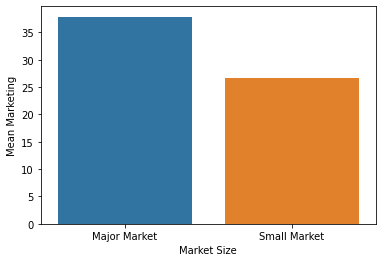

In [17]:
graphmarketmeanM = sns.barplot(x=market_sizes, y=marketmeanM)
graphmarketmeanM.set(xlabel='Market Size', ylabel='Mean Marketing')
print(marketmeanM)

[249.49589201877933, 155.13757861635222]


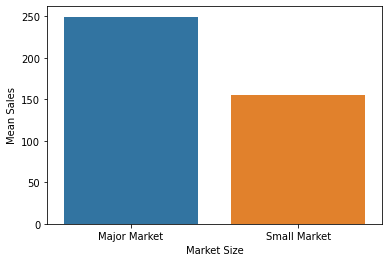

In [18]:
graphmarketmeanS = sns.barplot(x=market_sizes, y=marketmeanS)
graphmarketmeanS.set(xlabel='Market Size', ylabel='Mean Sales')
print(marketmeanS)

[91.3943661971831, 40.804638364779876]


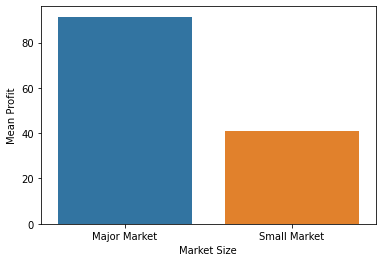

In [19]:
graphmarketmeanP = sns.barplot(x=market_sizes, y=marketmeanP)
graphmarketmeanP.set(xlabel='Market Size', ylabel='Mean Profit')
print(marketmeanP)

## Coffee Type

[32.01916666666666, 30.1017316017316]


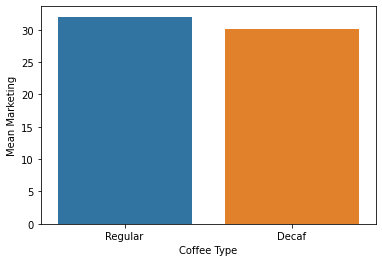

In [20]:
graphtypemeanM = sns.barplot(x=types, y=typemeanM)
graphtypemeanM.set(xlabel='Coffee Type', ylabel='Mean Marketing')
print(typemeanM)

[40.3625, 34.615591397849464]
[26.456944444444446, 27.059782608695652]


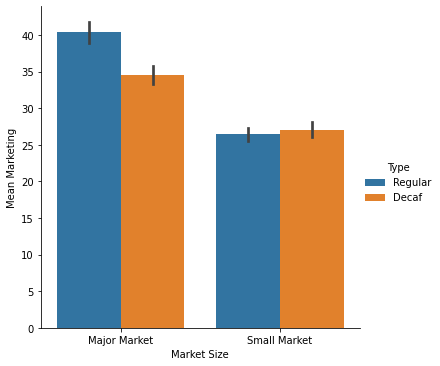

In [21]:
GraphtypemeanM = sns.catplot(data=dframe, kind="bar", x="Market_Size", y="Marketing", hue="Type")
GraphtypemeanM.set(xlabel='Market Size', ylabel='Mean Marketing')
print(mtypemeanM)
print(stypemeanM)

[196.74458333333334, 188.1082251082251]


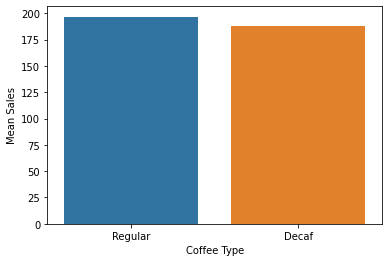

In [22]:
graphtypemeanS = sns.barplot(x=types, y=typemeanS)
graphtypemeanS.set(xlabel='Coffee Type', ylabel='Mean Sales')
print(typemeanS)

[268.88645833333334, 224.4758064516129]
[148.65, 163.5996376811594]


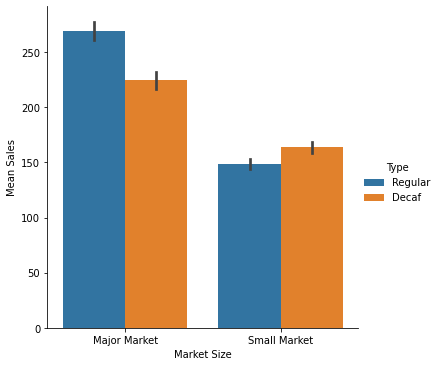

In [23]:
GraphtypemeanS = sns.catplot(data=dframe, kind="bar", x="Market_Size", y="Sales", hue="Type")
GraphtypemeanS.set(xlabel='Market Size', ylabel='Mean Sales')
print(mtypemeanS)
print(stypemeanS)

[63.66583333333333, 57.762445887445885]


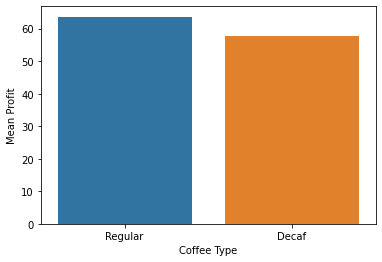

In [24]:
graphtypemeanP = sns.barplot(x=types, y=typemeanP)
graphtypemeanP.set(xlabel='Coffee Type', ylabel='Mean Profit')
print(typemeanP)

[107.146875, 71.06854838709677]
[34.678472222222226, 48.79528985507246]


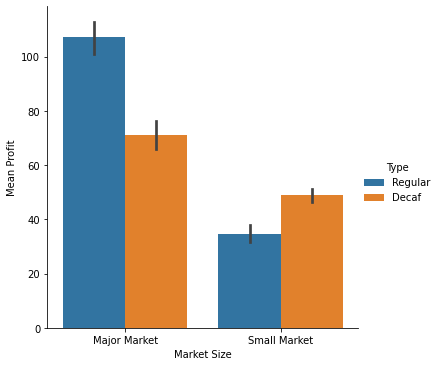

In [25]:
GraphtypemeanP = sns.catplot(data=dframe, kind="bar", x="Market_Size", y="Profit", hue="Type")
GraphtypemeanP.set(xlabel='Market Size', ylabel='Mean Profit')
print(mtypemeanP)
print(stypemeanP)

## Coffee Product Lines

[32.07078853046595, 30.20436507936508]


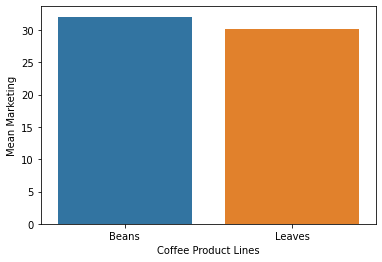

In [26]:
graphlinemeanM = sns.barplot(x=product_lines, y=linemeanM)
graphlinemeanM.set(xlabel='Coffee Product Lines', ylabel='Mean Marketing')
print(linemeanM)

[49.57142857142857, 26.46064814814815]
[21.510057471264368, 33.01215277777778]


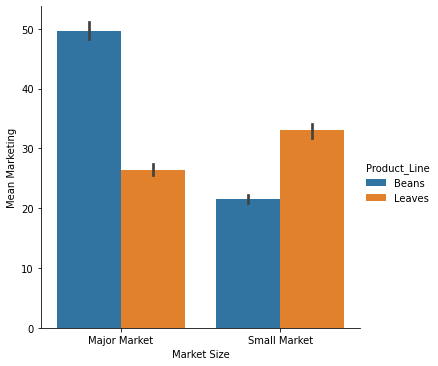

In [27]:
GraphlinemeanM = sns.catplot(data=dframe, kind="bar", x="Market_Size", y="Marketing", hue="Product_Line")
GraphlinemeanM.set(xlabel='Market Size', ylabel='Mean Marketing')
print(mlinemeanM)
print(slinemeanM)

[197.05376344086022, 188.4856150793651]


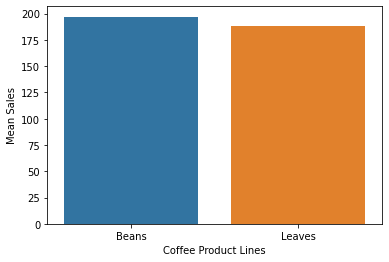

In [28]:
graphlinemeanS = sns.barplot(x=product_lines, y=linemeanS)
graphlinemeanS.set(xlabel='Coffee Product Lines', ylabel='Mean Sales')
print(linemeanS)

[310.78809523809525, 189.90625]
[128.42097701149424, 187.42013888888889]


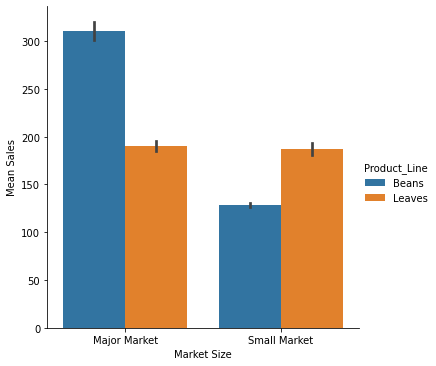

In [29]:
GraphlinemeanS = sns.catplot(data=dframe, kind="bar", x="Market_Size", y="Sales", hue="Product_Line")
GraphlinemeanS.set(xlabel='Market Size', ylabel='Mean Sales')
print(mlinemeanS)
print(slinemeanS)

[64.20385304659499, 57.65873015873016]


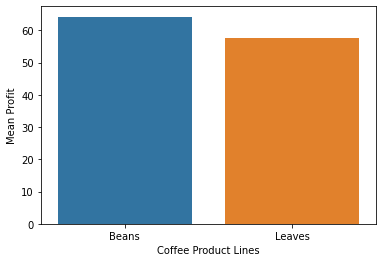

In [30]:
graphlinemeanP = sns.barplot(x=product_lines, y=linemeanP)
graphlinemeanP.set(xlabel='Coffee Product Lines', ylabel='Mean Profit')
print(linemeanP)

[114.2154761904762, 69.20717592592592]
[34.02442528735632, 48.997395833333336]


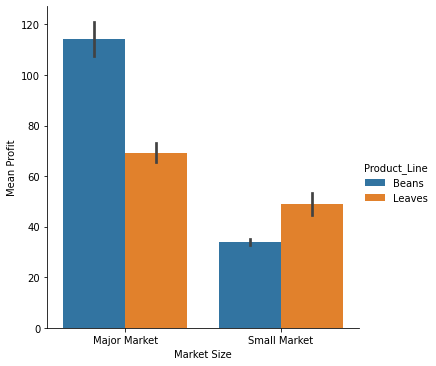

In [31]:
GraphlinemeanP = sns.catplot(data=dframe, kind="bar", x="Market_Size", y="Profit", hue="Product_Line")
GraphlinemeanP.set(xlabel='Market Size', ylabel='Mean Profit')
print(mlinemeanP)
print(slinemeanP)

## Coffee Product Types

[31.59659090909091, 27.852083333333333, 32.49659863945578, 32.34280303030303]


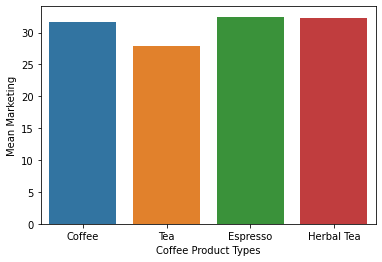

In [32]:
graphprodtypemeanM = sns.barplot(x=product_types, y=prodtypemeanM)
graphprodtypemeanM.set(xlabel='Coffee Product Types', ylabel='Mean Marketing')
print(prodtypemeanM)

[43.52450980392157, 20.470588235294116, 55.282407407407405, 31.82017543859649]
[24.08641975308642, 33.30797101449275, 19.266129032258064, 32.74]


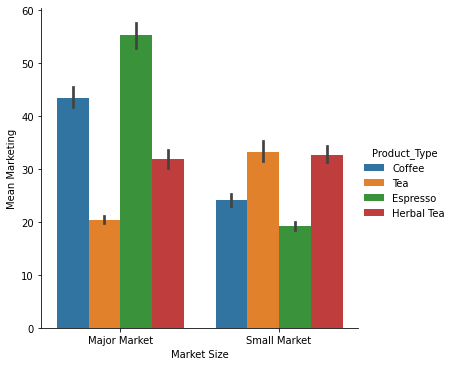

In [33]:
GraphprodtypemeanM = sns.catplot(data=dframe, kind="bar", x="Market_Size", y="Marketing", hue="Product_Type")
GraphprodtypemeanM.set(xlabel='Market Size', ylabel='Mean Marketing')
print(mprodtypemeanM)
print(sprodtypemeanM)

[205.32954545454547, 179.971875, 189.62244897959184, 196.22537878787878]


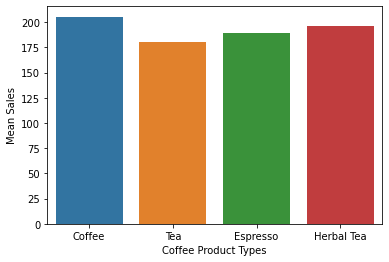

In [34]:
graphprodtypemeanS = sns.barplot(x=product_types, y=prodtypemeanS)
graphprodtypemeanS.set(xlabel='Coffee Product Types', ylabel='Mean Sales')
print(prodtypemeanS)

[313.71813725490193, 172.94117647058823, 308.0208333333333, 205.08552631578948]
[137.08487654320987, 185.16847826086956, 120.875, 189.49166666666667]


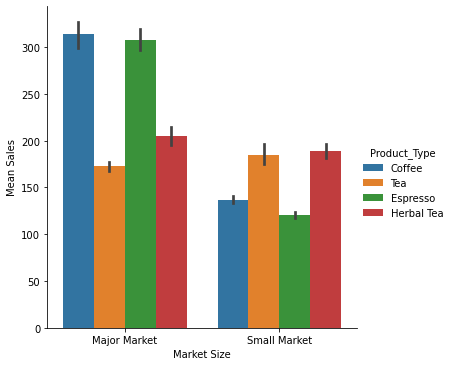

In [35]:
GraphprodtypemeanS = sns.catplot(data=dframe, kind="bar", x="Market_Size", y="Sales", hue="Product_Type")
GraphprodtypemeanS.set(xlabel='Market Size', ylabel='Mean Sales')
print(mprodtypemeanS)
print(sprodtypemeanS)

[70.72253787878788, 55.19375, 58.35034013605442, 59.89962121212121]


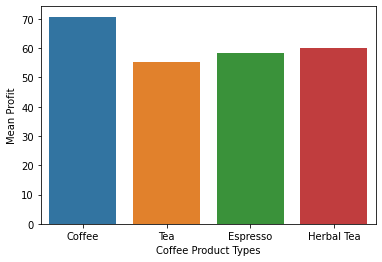

In [36]:
graphprodtypemeanP = sns.barplot(x=product_types, y=prodtypemeanP)
graphprodtypemeanP.set(xlabel='Coffee Product Types', ylabel='Mean Profit')
print(prodtypemeanP)

[130.22058823529412, 75.41666666666667, 99.09953703703704, 63.651315789473685]
[33.260802469135804, 40.2463768115942, 34.689516129032256, 57.04833333333333]


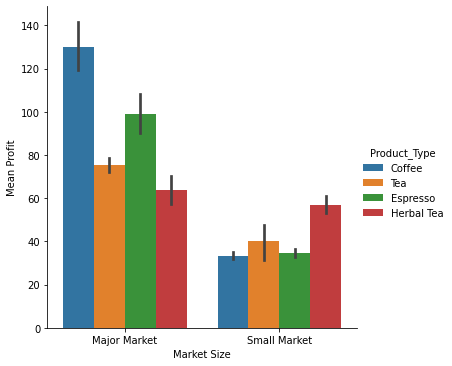

In [37]:
GraphprodtypemeanP = sns.catplot(data=dframe, kind="bar", x="Market_Size", y="Profit", hue="Product_Type")
GraphprodtypemeanP.set(xlabel='Market Size', ylabel='Mean Profit')
print(mprodtypemeanP)
print(sprodtypemeanP)

### Beans

[31.59659090909091, 32.49659863945578]


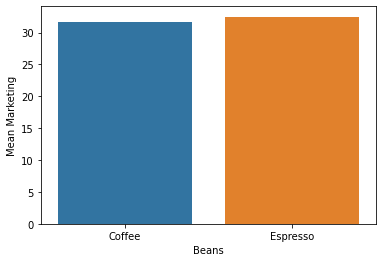

In [38]:
graphBeanmeanM = sns.barplot(x=Beans, y=BeanmeanM)
graphBeanmeanM.set(xlabel='Beans', ylabel='Mean Marketing')
print(BeanmeanM)

[43.52450980392157, 55.282407407407405]
[24.08641975308642, 19.266129032258064]


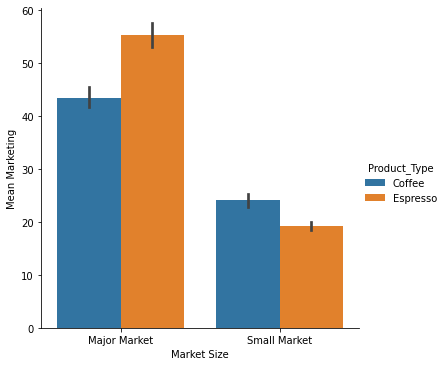

In [39]:
GraphBeanmeanM = sns.catplot(data=beans, kind="bar", x="Market_Size", y="Marketing", hue="Product_Type")
GraphBeanmeanM.set(xlabel='Market Size', ylabel='Mean Marketing')
print(mbeanmeanM)
print(sbeanmeanM)

[205.32954545454547, 189.62244897959184]


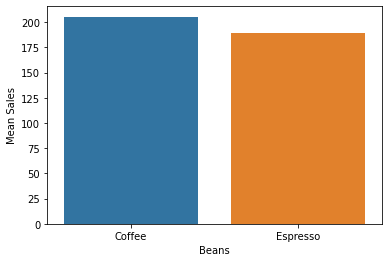

In [40]:
graphBeanmeanS = sns.barplot(x=Beans, y=BeanmeanS)
graphBeanmeanS.set(xlabel='Beans', ylabel='Mean Sales')
print(BeanmeanS)

[313.71813725490193, 308.0208333333333]
[137.08487654320987, 120.875]


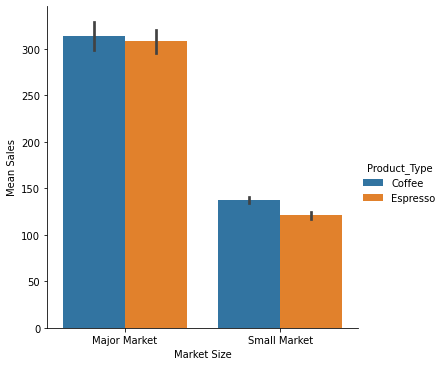

In [41]:
GraphBeanmeanS = sns.catplot(data=beans, kind="bar", x="Market_Size", y="Sales", hue="Product_Type")
GraphBeanmeanS.set(xlabel='Market Size', ylabel='Mean Sales')
print(mbeanmeanS)
print(sbeanmeanS)

[70.72253787878788, 58.35034013605442]


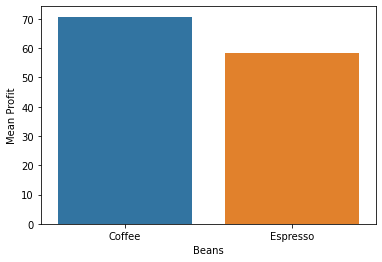

In [42]:
graphBeanmeanP = sns.barplot(x=Beans, y=BeanmeanP)
graphBeanmeanP.set(xlabel='Beans', ylabel='Mean Profit')
print(BeanmeanP)

[130.22058823529412, 99.09953703703704]
[33.260802469135804, 34.689516129032256]


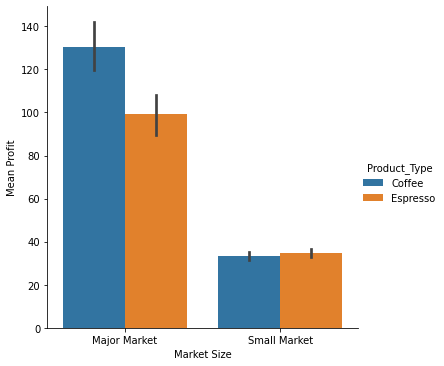

In [43]:
GraphBeanmeanP = sns.catplot(data=beans, kind="bar", x="Market_Size", y="Profit", hue="Product_Type")
GraphBeanmeanP.set(xlabel='Market Size', ylabel='Mean Profit')
print(mbeanmeanP)
print(sbeanmeanP)

### Leaves

[27.852083333333333, 32.34280303030303]


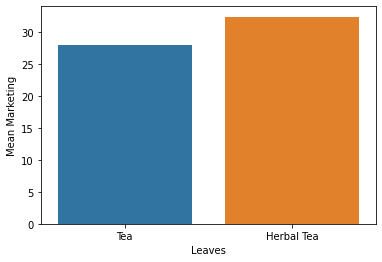

In [44]:
graphLeavesmeanM = sns.barplot(x=Leaves, y=LeavesmeanM)
graphLeavesmeanM.set(xlabel='Leaves', ylabel='Mean Marketing')
print(LeavesmeanM)

[20.470588235294116, 31.82017543859649]
[33.30797101449275, 32.74]


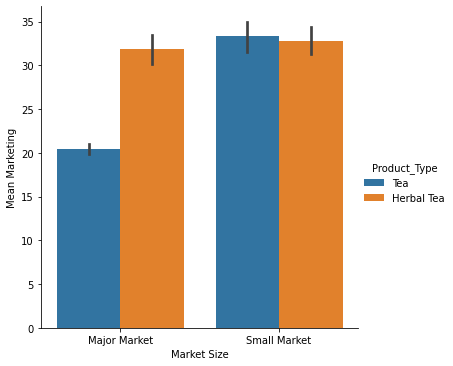

In [45]:
GraphLeavesmeanM = sns.catplot(data=leaves, kind="bar", x="Market_Size", y="Marketing", hue="Product_Type")
GraphLeavesmeanM.set(xlabel='Market Size', ylabel='Mean Marketing')
print(mleavesmeanM)
print(sleavesmeanM)

[179.971875, 196.22537878787878]


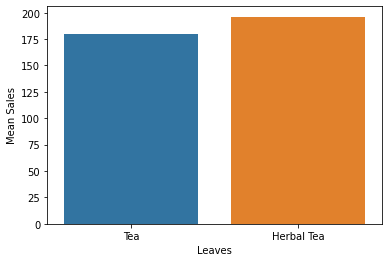

In [46]:
graphLeavesmeanS = sns.barplot(x=Leaves, y=LeavesmeanS)
graphLeavesmeanS.set(xlabel='Leaves', ylabel='Mean Sales')
print(LeavesmeanS)

[172.94117647058823, 205.08552631578948]
[185.16847826086956, 189.49166666666667]


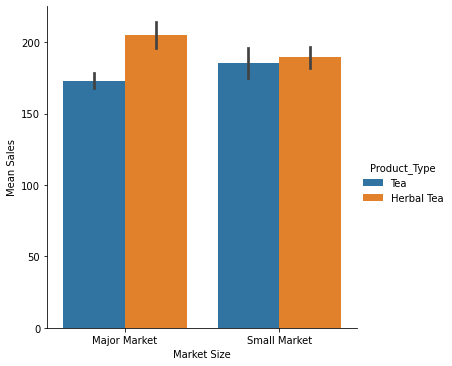

In [47]:
GraphLeavesmeanS = sns.catplot(data=leaves, kind="bar", x="Market_Size", y="Sales", hue="Product_Type")
GraphLeavesmeanS.set(xlabel='Market Size', ylabel='Mean Sales')
print(mleavesmeanS)
print(sleavesmeanS)

[55.19375, 59.89962121212121]


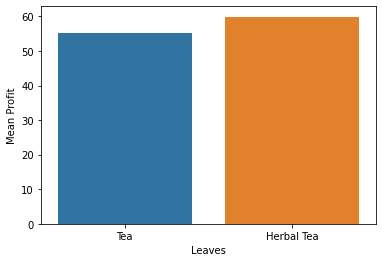

In [48]:
graphLeavesmeanP = sns.barplot(x=Leaves, y=LeavesmeanP)
graphLeavesmeanP.set(xlabel='Leaves', ylabel='Mean Profit')
print(LeavesmeanP)

[75.41666666666667, 63.651315789473685]
[40.2463768115942, 57.04833333333333]


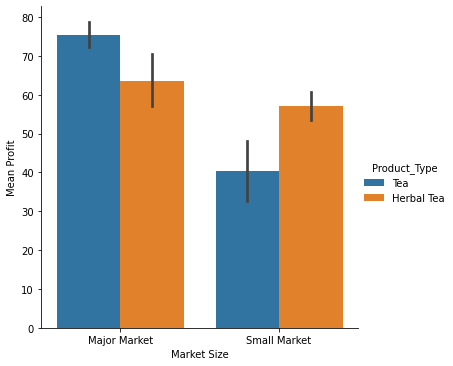

In [49]:
GraphLeavesmeanP = sns.catplot(data=leaves, kind="bar", x="Market_Size", y="Profit", hue="Product_Type")
GraphLeavesmeanP.set(xlabel='Market Size', ylabel='Mean Profit')
print(mleavesmeanP)
print(sleavesmeanP)